<a href="https://colab.research.google.com/github/hansjang/Algorithm/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4_%EA%B8%B0%EC%B6%9C%EB%AA%A8%EC%9D%982%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제2회 기출동형 모의고사 풀이

In [1]:
!git clone https://github.com/ADPclass/ADP_book_ver01.git

Cloning into 'ADP_book_ver01'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 172 (delta 36), reused 55 (delta 19), pack-reused 81 (from 1)
Receiving objects: 100% (172/172), 17.54 MiB | 9.51 MiB/s, done.
Resolving deltas: 100% (49/49), done.


# **머신러닝**

In [ ]:
# 기본 모듈 및 데이터 불러오기
import numpy as np
import pandas as pd

df = pd.read_csv('/content/ADP_book_ver01/data/diabetes_for_test.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**1. 데이터 탐색(1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA)**



In [ ]:
import matplotlib.pyplot as plt

display(df.info())
# 총 9개 변수, 768개 관측치가 있다.
# 총 9개 변수 모두 수치형 변수로 보인다.
# 768개 관측치에서 결측치나 입력오류값은 없다.

display(df.describe())
# Insulin, Age 변수의 평균값과 최대값의 차이가 10배 이상 나므로 이상치를 의심할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


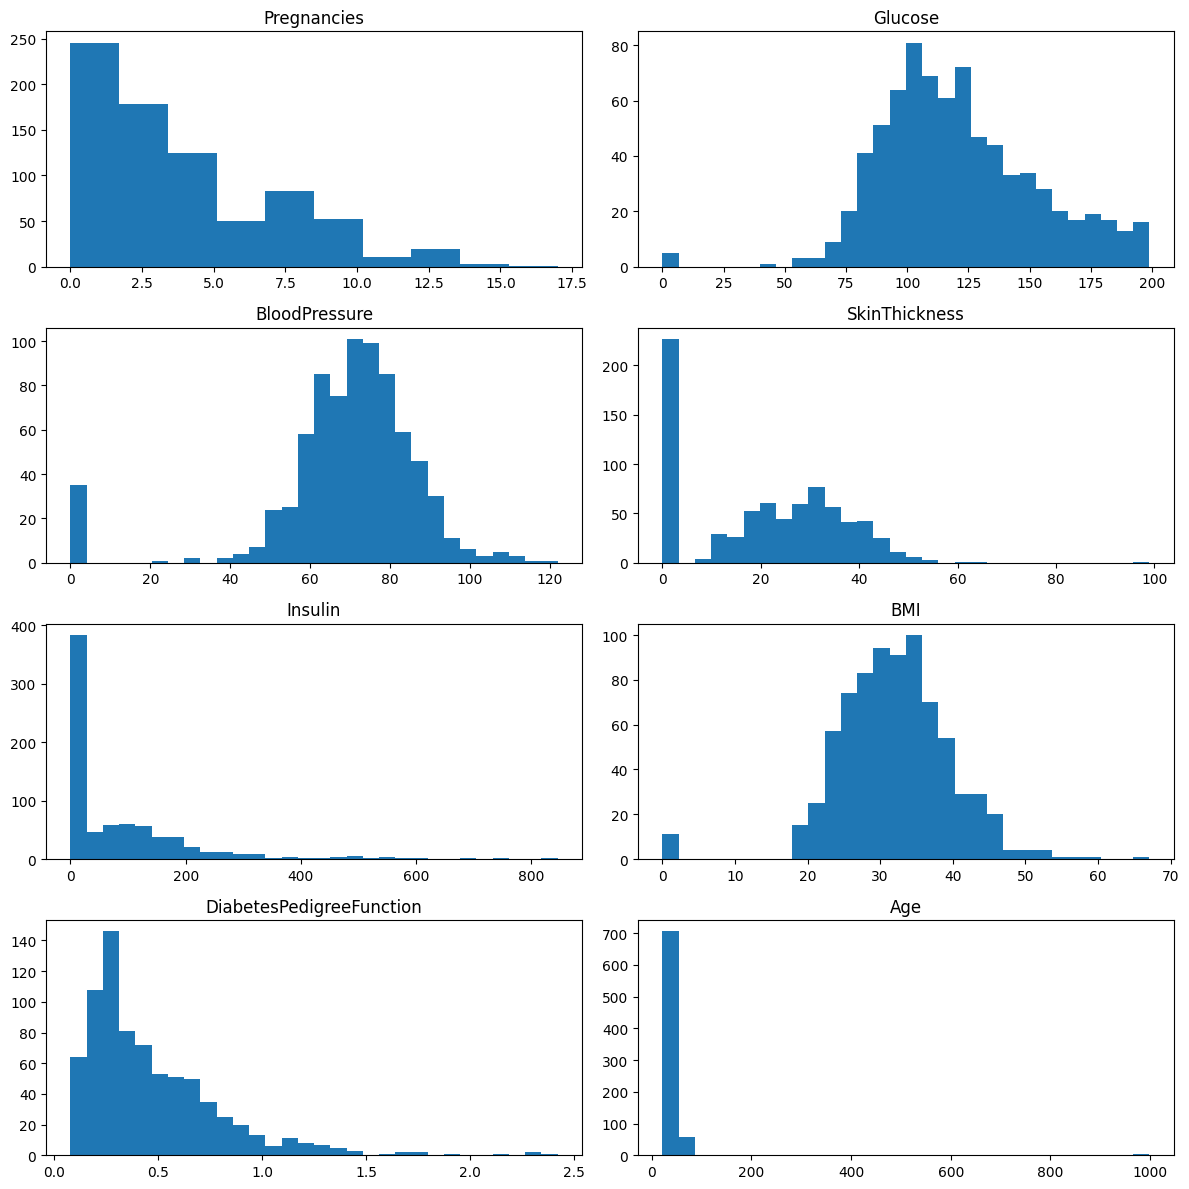

In [ ]:
# 서브플롯 생성
fig, axs = plt.subplots(4, 2, figsize=(12, 12))  # 4행 2열

# 독립변수 히스토그램
axs[0, 0].hist(df['Pregnancies'], bins=10)
axs[0, 0].set_title('Pregnancies')

axs[0, 1].hist(df['Glucose'], bins=30)
axs[0, 1].set_title('Glucose')

axs[1, 0].hist(df['BloodPressure'], bins=30)
axs[1, 0].set_title('BloodPressure')

axs[1, 1].hist(df['SkinThickness'], bins=30)
axs[1, 1].set_title('SkinThickness')

axs[2, 0].hist(df['Insulin'], bins=30)
axs[2, 0].set_title('Insulin')

axs[2, 1].hist(df['BMI'], bins=30)
axs[2, 1].set_title('BMI')

axs[3, 0].hist(df['DiabetesPedigreeFunction'], bins=30)
axs[3, 0].set_title('DiabetesPedigreeFunction')

axs[3, 1].hist(df['Age'], bins=30)
axs[3, 1].set_title('Age')

# 레이아웃 조정
plt.tight_layout()
plt.show()

,count
Outcome,
0,500
1,268


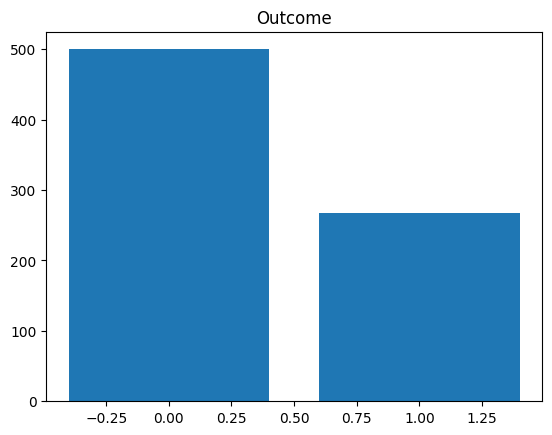

In [ ]:
# 종속변수 히스토그램
# display(df['Outcome'].unique())
Outcome_type = df['Outcome'].value_counts()
display(Outcome_type)
plt.bar(Outcome_type.index, Outcome_type.values)
plt.title('Outcome')
plt.show()
# 종속변수 Outcome은 이산형 변수이다.

<Axes: >

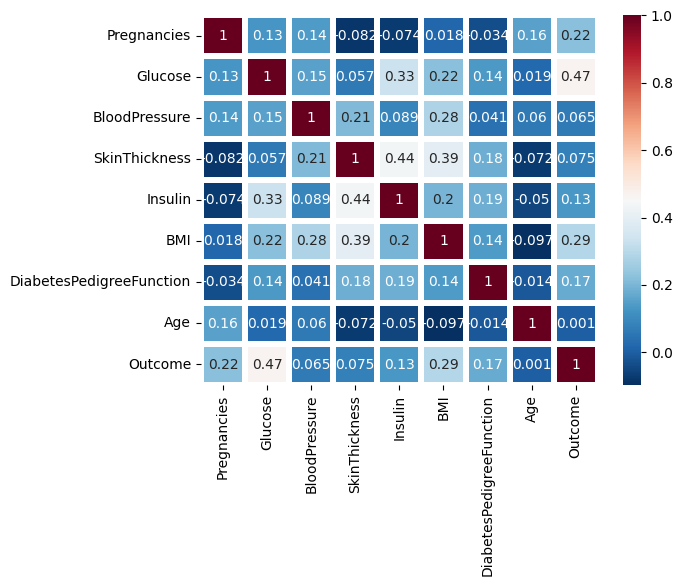

In [ ]:
# 상관 관계 확인
import seaborn as sns
df_corr = df.corr(method='pearson')
sns.heatmap(df_corr,
            xticklabels = df_corr.columns,
            yticklabels = df_corr.columns,
            cmap = 'RdBu_r',
            annot=True,
            linewidth=3)
# 독립변수간 0.7이상, 혹은 -0.7이하의 높은 상관 관계를 가지는 조합은 발견되지 않는다.

**1. 데이터 탐색(2) 이상치를 식별하고 처리하시오**


In [ ]:
# 이상치 식별을 위해 Tukey's Fence(IQR) 방법을 사용한다
def outliers_iqr(df, col):
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr= q3 - q1
  lower = q1 - (iqr * 1.5)
  upper = q3 + (iqr * 1.5)
  outliers = df[(df[col] > upper) | (df[col] < lower)]
  return outliers[[col]]

# 이상치를 확인할 변수 리스트
# columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
columns_to_check = df.columns[:-1]

# 결과 저장을 위한 딕셔너리
outliers_dict = {}

# 각 변수에 대해 이상치 식별
for col in columns_to_check:
    outliers_dict[col] = outliers_iqr(df, col)

# 각 변수의 이상치 출력
# for col, outlier_data in outliers_dict.items():
#     print(f"Outliers for {col}:\n{outlier_data}\n")

# 각 변수의 이상치 개수 출력
for col, outlier_data in outliers_dict.items():
    print(f"Outliers for {col}:\n{len(outlier_data)}\n")

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Outliers for Pregnancies:
4

Outliers for Glucose:
5

Outliers for BloodPressure:
45

Outliers for SkinThickness:
1

Outliers for Insulin:
34

Outliers for BMI:
19

Outliers for DiabetesPedigreeFunction:
29

Outliers for Age:
11



In [ ]:
# 이상치 처리
# 768개 관측치 중 Insulin 변수에서 최대 34개의 이상치가 발견되었다.
# 이는 전체 데이터의 4.4%에 불과하므로 삭제해도
# 모델에 큰 영향을 주지 않을 것으로 보인다.
# 따라서 이상치를 삭제한다.
drop_outliers = df.drop(index=outlier_data.index)
print(drop_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               757 non-null    int64  
 1   Glucose                   757 non-null    int64  
 2   BloodPressure             757 non-null    int64  
 3   SkinThickness             757 non-null    int64  
 4   Insulin                   757 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  757 non-null    float64
 7   Age                       757 non-null    int64  
 8   Outcome                   757 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.1 KB
None


**1. 데이터 탐색(3) 앞선 두 단계에서 발견한 향후 분석시에 고려해야할 사항을 작성하시오**


In [ ]:
# 독립변수들의 수치 범위가 다르고 종모양 분포가 아니므로 정규화 스케일링이 필요하다.
# 종속변수 Outcome의 클래스가 불균형하므로 업 샘플링(오버 샘플링), 혹은 언더 샘플링이 필요하다.

**2. 클래스 불균형 처리(1) 업 샘플링 과정을 설명하고 결과를 작성하시오**


In [ ]:
# 업 샘플링은 소수 클래스의 데이터를 인위적으로 늘려 각 클래스간의 비율을 맞추는 방법이다.
# 랜덤 오버 샘플링, SMOTE, ADASYN 등의 방법이 있다.
# SMOTE는 랜덤 오버 샘플링처럼 단순히 복제하는 것이 아니라
# 주변 이웃 데이터를 활용해 새로운 데이터 포인트를 생성하기 때문에 과적합 문제를 줄일 수 있다.
# 따라서, SMOTE를 활용해 업 샘플링을 실시한다.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
# 데이터 독립변수와 종속변수로 분리
X = drop_outliers.drop(['Outcome'], axis = 1)
y = drop_outliers['Outcome']
# SMOTE 적용
smt_X, smt_y = sm.fit_resample(X, y)
# 클래스 분포 및 데이터 수량 확인
display(smt_y.value_counts())
display(smt_X.shape)

,count
Outcome,
1,491
0,491


(982, 8)

**2. 클래스 불균형 처리(2) 언더 샘플링 과정을 설명하고 결과를 작성하시오**


In [ ]:
# 언더 샘플링은 다수 클래스의 데이터를 줄여서 각 클래스간의 비율을 맞추는 방법이다.
# 랜덤 언더 샘플링, 클러스터 중심 언더샘플링(Cluster Cenroids), Tomek Links 등의 방법이 있다.
# Tomek Links는 다수 클래스와 소수 클래스간 경계에 있는 다수 클래스 데이터를 제거해 주기 때문에
# 중요한 경계 데이터를 보존할 수 있어 모델의 분류 성능을 높여 준다.
# 따라서 Tomek Links를 활용해 언더 샘플링을 실시한다.
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
tl_X, tl_y = tl.fit_resample(X, y)
# 클래스 분포 및 데이터 수량 확인
display(tl_y.value_counts())
display(tl_X.shape)

,count
Outcome,
0,440
1,266


(706, 8)

**2. 클래스 불균형 처리(3) 둘 중 하나를 선택하고 선택한 이유를 서술하시오**


In [ ]:
# 소수 클래스 데이터가 매우 적고 더 많은 데이터가 필요하다면
# 업 샘플링 방식인 SMOTE를 선택하고,
# 경계 데이터 정제가 필요하다면
# 언더 샘플링 방식인 Tomek Links를 선택한다.
# 이 두 가지를 결합하여 각각의 장점을 취할 수도 있으므로
# SMOTE + Tomek Links를 선택하겠다.
from imblearn.combine import SMOTETomek
smtl = SMOTETomek(random_state = 42)
smtl_X, smtl_y = smtl.fit_resample(X, y)
# 클래스 분포 및 데이터 수량 확인
display(smtl_y.value_counts())
display(smtl_X.shape)
display(smtl_y.shape)

,count
Outcome,
1,468
0,468


(936, 8)

(936,)

**3. 모델링(1) 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오**


In [ ]:
# 종속변수가 이진범주형인 분류 분석 알고리즘의 종류는 아래와 같다.
# 1) 로지스틱 회귀(Logistic Regression)
# 2) 의사결정 나무(Decision Tree)
# 3) 랜덤 포레스트(Random Forest)
# 4) k-최근접이웃(K-Nearest Neighbors, KNN)
# 5) 서포트 벡터 머신(Support Vector Machine, SVM)
# 이 가운데 정확도 측면에서는 앙상블 기법인 랜덤 포레스트 기법을 추천하고,
# 속도 측면에서는 계산 복잡도가 낮은 로지스틱 회귀 기법을 추천한다.

**3.모델링(2) 모델을 비교하고 결과를 설명하시오**


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(smtl_X, smtl_y,
                                                    train_size = 0.7,
                                                    stratify = smtl_y)

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 훈련 데이터에 맞춰서 스케일링 적용
train_X_scaled = scaler.fit_transform(train_X)
# 테스트 데이터에도 동일하게 적용
test_X_scaled = scaler.transform(test_X)

# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
# 모델 생성 및 학습
lr = LogisticRegression()
lr.fit(train_X_scaled, train_y)
# 예측 및 성능 평가
pred_y = lr.predict(test_X_scaled)

from sklearn.metrics import accuracy_score, f1_score
lr_acc = accuracy_score(test_y, pred_y)
lr_f1 = f1_score(test_y, pred_y)
print(f'로지스틱회귀 정확도: {lr_acc}')
print(f'로지스틱회귀 F1점수: {lr_f1}')


# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
# 모델 생성 및 학습
rf = RandomForestClassifier()
rf.fit(train_X_scaled, train_y)
# 예측 및 성능 평가
pred_y = rf.predict(test_X_scaled)

rf_acc = accuracy_score(test_y, pred_y)
rf_f1 = f1_score(test_y, pred_y)
print(f'랜덤 포레스트 정확도: {rf_acc}')
print(f'랜덤 포레스트 F1점수: {rf_f1}')

# 랜덤 포레스트의 정확도 및 F1 점수가 로지스틱회귀 모델보다 좋으므로
# 랜덤 포레스트의 성능이 더 좋다고 할 수 있다.

로지스틱회귀 정확도: 0.7580071174377224
로지스틱회귀 F1점수: 0.7481481481481481
랜덤 포레스트 정확도: 0.8256227758007118
랜덤 포레스트 F1점수: 0.8304498269896193


**3.모델링(3) 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오**


In [ ]:
# 속도 개선을 위한 차원 축소 방법에는 주성분 분석(PCA)이 있다.
# 주성분 분석은 데이터의 분산이 가장 큰 방향으로 축을 새로 설정하여
# 차원을 줄이는 방법이다.
# 여기서는 랜덤 포레스트 모델의 PCA를 사용하기 전과 후를 비교하겠다.

# PCA 사용전 랜덤 포레스트의 수행시간과 성능
import time
# 모델 학습
start_time = time.time()
rf.fit(train_X_scaled, train_y)
# 성능 평가
pred_y = rf.predict(test_X_scaled)
rf_acc = accuracy_score(test_y, pred_y)
rf_f1 = f1_score(test_y, pred_y)
print(f'PCA이전 랜덤 포레스트 정확도: {rf_acc}')
print(f'PCA이전 랜덤 포레스트 F1점수: {rf_f1}')
time_spent = time.time() - start_time
print(f'PCA이전 랜덤 포레스트 수행시간 : {time_spent}')
print("-" * 50)

# PCA를 통한 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_X_pca = pca.fit_transform(train_X_scaled)
test_X_pca = pca.transform(test_X_scaled)

# PCA 사용후 랜덤포레스트의 수행시간과 성능
# 모델 학습
start_time = time.time()
rf.fit(train_X_pca, train_y)
# 성능 평가
pred_y = rf.predict(test_X_pca)
rf_acc = accuracy_score(test_y, pred_y)
rf_f1 = f1_score(test_y, pred_y)
print(f'PCA이후 랜덤 포레스트 정확도: {rf_acc}')
print(f'PCA이후 랜덤 포레스트 F1점수: {rf_f1}')
time_spent = time.time() - start_time
print(f'PCA이후 랜덤 포레스트 수행시간 : {time_spent}')

PCA이전 랜덤 포레스트 정확도: 0.8291814946619217
PCA이전 랜덤 포레스트 F1점수: 0.8367346938775511
PCA이전 랜덤 포레스트 수행시간 : 0.427431583404541
--------------------------------------------------
PCA이후 랜덤 포레스트 정확도: 0.7046263345195729
PCA이후 랜덤 포레스트 F1점수: 0.7167235494880546
PCA이후 랜덤 포레스트 수행시간 : 0.3986625671386719


PCA 이후 정확도/F1점수는 낮아졌으나 수행시간을 향상되었다.

# 통계분석

**1.회사 제품의 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속 함유량이 차이가 난다고 제보를 받았다. 해당 금속 함유량 데이터에 대한 검정을 수행하시오(유의확률:0.05)**


In [3]:
# 기본 모듈 및 데이터 불러오기
import numpy as np
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('/content/ADP_book_ver01/data/metalicity')
display(df)
display(df.info())

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   metalicity  150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


None

**(1) 귀무가설과 대립가설을 작성하시오**

In [ ]:
# 분산에 대한 검정은 카이제곱검정을 통해 수행할 수 있다.
# 분산이 1.3을 넘는지 아닌지를 판단해야 한다.
# 귀무가설(H0) : 제조사별 금속함유량의 분산이 1.3보다 작다
# 대립가설(H1) : 제조사별 금속함유량의 분산이 1.3보다 크다

**(2) 가설을 양측 검정하시오**


In [10]:
from scipy.stats import chi2

# 데이터프레임 => numpy로 변환
arr = df.to_numpy()

# 표본 크기와 표본 분산 계산
n = len(arr)
sample_var = np.var(arr, ddof = 1) # 표본 분산 (ddof=1로 자유도 설정)
print("표본 분산:", sample_var)

# 귀무가설 하의 분산값
sigma_0_squared = 1.3

# 카이제곱 검정 통계량 계산
chi2_statistic = (n - 1) * sample_var / sigma_0_squared

# 자유도는 n-1
ddf = n - 1

# 양측 검정이므로 유의수준 0.05로 양끝 2.5% 구간의 임계값 계산
alpha = 0.05
chi2_critical_low = chi2.ppf(alpha / 2, ddf)
chi2_critical_high = chi2.ppf(1 - alpha / 2, ddf)

# p-value 계산
p_value = 2 * min(chi2.cdf(chi2_statistic, ddf), 1 - chi2.cdf(chi2_statistic, ddf))

# 결과 출력
sample_var, chi2_statistic, chi2_critical_low, chi2_critical_high, p_value
# (0.7432009850287776,
#  85.18226674560604,
#  117.09798286232112,
#  184.68695493443445,
#  1.2132207644870916e-05)

# p_value가 유의수준 0.05 보다 작으므로 귀무가설을 기각한다.
# 따라서 제조사별 금속함유량의 분산이

표본 분산: 0.7432009850287776


(0.7432009850287776,
 85.18226674560604,
 117.09798286232112,
 184.68695493443445,
 1.2132207644870916e-05)

**2. 제품 200개의 Lot별 불량 제품 수량 데이터에 대해 p관리도를 구하고 시각화하시오**

In [11]:
# 데이터 불러오기
df = pd.read_csv('/content/ADP_book_ver01/data/lot_quality.csv')
display(df.head())

,lot,생산수량,불량수량
0,1,587,19
1,2,588,15
2,3,455,19
3,4,666,12
4,5,750,15


**(1) p관리도에 따라 관리중심선(Center Line), 관리 상한선, 하한선을 구하시오**

In [12]:
import numpy as np
import pandas as pd

# 불량률 계산
df['불량률'] = df['불량수량'] / df['생산수량']

# 평균 불량률 및 표준편차 계산
mean_defect_rate = df['불량률'].mean()
std_dev_defect_rate = df['불량률'].std()

# 관리 상한선 및 하한선 계산
UCL = mean_defect_rate + 3 * std_dev_defect_rate
LCL = mean_defect_rate - 3 * std_dev_defect_rate

# LCL이 0보다 작으면 0으로 설정
LCL = max(LCL, 0)

print(f"관리중심선 (CL): {mean_defect_rate:.4f}")
print(f"관리 상한선 (UCL): {UCL:.4f}")
print(f"관리 하한선 (LCL): {LCL:.4f}")

관리중심선 (CL): 0.0299
관리 상한선 (UCL): 0.0595
관리 하한선 (LCL): 0.0002


**(2) 관리도를 시각화하시오**

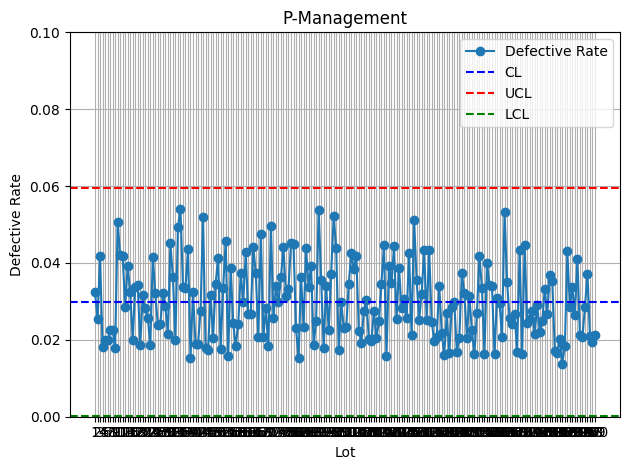

In [22]:
# 관리도 시각화
import matplotlib.pyplot as plt

fig = plt.figure()  # 그림 그릴 영역 확보
fig_1 = fig.add_subplot(1, 1, 1)

fig_1.plot(df['lot'], df['불량률'], marker='o', label='Defective Rate')
plt.axhline(y=mean_defect_rate, color='blue', linestyle='--', label='CL')
plt.axhline(y=UCL, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='green', linestyle='--', label='LCL')

plt.title('P-Management')
plt.xlabel('Lot')
plt.ylabel('Defective Rate')
plt.xticks(df['lot'])
plt.ylim(0, 0.1)  # Y축 범위 조정
plt.legend()
plt.grid()


fig.tight_layout()
plt.show()

**3. 제품 1, 2를 만드는 데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데 이때 최대 수익을 낼 수 있을 때의 제품1과 제품2의 개수를 구하라.**

In [23]:
from scipy.optimize import linprog

# 목표 함수의 계수 (최대화 문제이므로 부호를 반대로 바꿔 최소화 문제로 변환)
c = [-12, -18]

# 제약 조건 계수 행렬
A = [
    [20, 40],  # 재료 a의 제약 조건
    [20, 30],  # 재료 b의 제약 조건
    [20, 30]   # 재료 c의 제약 조건
]

# 제약 조건 우변
b = [1300, 1000, 1200]

# 각 제품의 생산 개수는 음수가 될 수 없음
x0_bounds = (0, None)
x1_bounds = (0, None)

# 선형 계획 문제 해결
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -600.0
              x: [ 5.000e+01  0.000e+00]
            nit: 2
          lower:  residual: [ 5.000e+01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 3.000e+02  0.000e+00  2.000e+02]
                 marginals: [-0.000e+00 -6.000e-01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

제품 1을 50개, 제품 2를 0개 생산하면 최대 수익 600만원을 얻을 수 있다.

In [ ]:
data =['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b']
print(data)

['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b']


**4. 상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다.**

**(1) 구매 패턴으로 볼 때 두 상품이 연관이 있는지 가설을 세우고 검정하시오**

In [24]:
# 귀무가설(H0) : 두 상품 a와 b는 구매 패턴에서 독립적이다.
# 대립가설(H1) : 두 상품 a와 b는 구매 패턴에서 독립적이지 않다.

# 카이제곱 독립성 검정
import pandas as pd
from scipy.stats import chi2_contingency

# 주어진 데이터
data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b']

# 'a'와 'b'의 구매 빈도를 계산
purchase_counts = pd.Series(data).value_counts()

# 데이터에서의 연속적인 'a'와 'b'의 빈도 계산
a_after_a = sum(1 for i in range(len(data) - 1) if data[i] == 'a' and data[i + 1] == 'a')
a_after_b = sum(1 for i in range(len(data) - 1) if data[i] == 'b' and data[i + 1] == 'a')
b_after_a = sum(1 for i in range(len(data) - 1) if data[i] == 'a' and data[i + 1] == 'b')
b_after_b = sum(1 for i in range(len(data) - 1) if data[i] == 'b' and data[i + 1] == 'b')

# 2x2 분할표 작성
contingency_table = [
    [a_after_a, a_after_b],
    [b_after_a, b_after_b]
]

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

contingency_table, chi2, p

([[5, 3], [4, 7]], 0.437215909090909, 0.5084692874662825)

**(2) 가설을 채택하시오**

In [ ]:
# p-value가 0.5로 유의수준 0.05보다 높으므로 귀무가설을 기각할 수 없다.
# 즉, 두 상품 a와 b의 구매 패턴은 독립적이라고 할 수 있다.